## Evaluate the number of observatories available to follow up an event##

This demonstrates the nFollowStacker, which adds a column indicating how many observatories would be available to follow up an event that occured during that visit (for a user-specified timestep). 
You can then calculate statistics on this new column - such as the average number of observatories available for all visits to a particular region on the sky. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
from mafContrib import NFollowStacker

In [4]:
# Set the database and query
runName = 'enigma_1189'
opsdb = db.OpsimDatabase(runName + '_sqlite.db')
outDir = 'FollowUp'
resultsDb = db.ResultsDb(outDir=outDir)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database with constraint night < 30
Found 19301 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting.
monopole: 11.3307  dipole: lon: 106.128, lat: 80.3371, amp: 4.38367
Plotting complete.


/Users/lynnej/anaconda/lib/python2.7/site-packages/sqlalchemy/sql/elements.py:3758: SAWarning: Textual SQL expression 'night < 30' should be explicitly declared as text('night < 30') (this warning may be suppressed after 10 occurrences)
  {"expr": util.ellipses_string(element)})


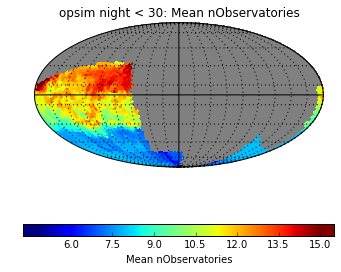

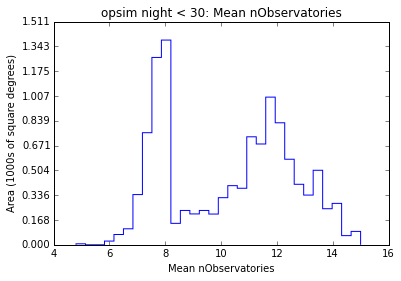

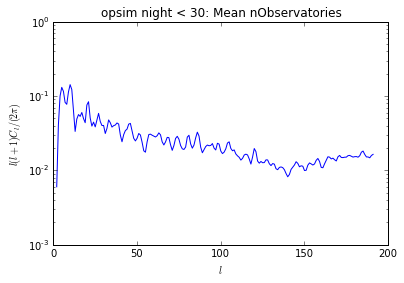

In [5]:
sqlconstraint = 'night < 30'

slicer = slicers.HealpixSlicer(nside=64)
metric = metrics.MeanMetric('nObservatories')
stackerList = [NFollowStacker(minSize=6.5)]
bundle = metricBundles.MetricBundle(metric, slicer, sqlconstraint, stackerList=stackerList)
bgroup = metricBundles.MetricBundleGroup({0:bundle}, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database with constraint night < 30
Found 19301 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting.
monopole: 10.4416  dipole: lon: 150.073, lat: -4.66925, amp: 4.67316
Plotting complete.


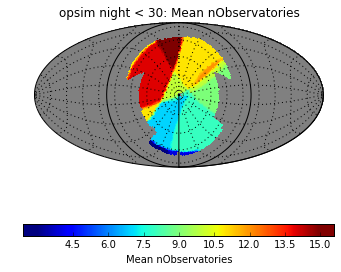

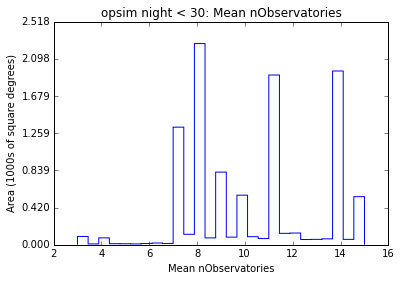

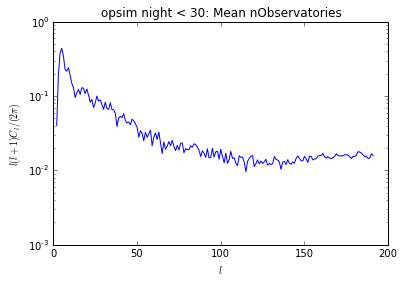

In [6]:
# Change it up to be in alt,az
slicer = slicers.HealpixSlicer(nside=64, latCol='zenithDistance', lonCol='azimuth', useCache=True)
plotDict = {'rot2':90}
bundle = metricBundles.MetricBundle(metric, slicer, sqlconstraint, stackerList=stackerList, plotDict=plotDict)
bgroup = metricBundles.MetricBundleGroup({0:bundle}, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database with constraint night < 30
Found 19301 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting.
monopole: 10.5987  dipole: lon: 179.23, lat: 30.4545, amp: 7.0398
Plotting complete.


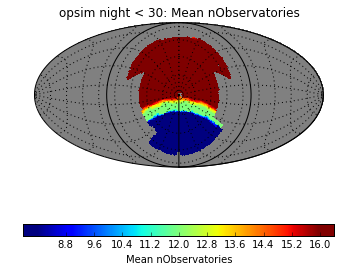

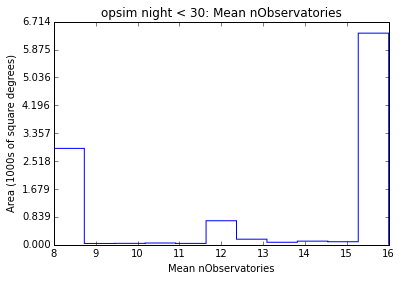

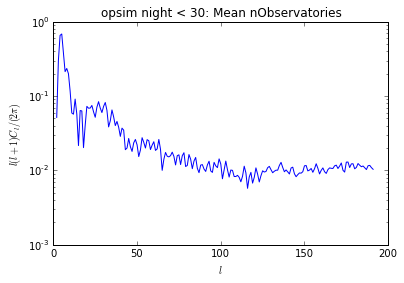

In [7]:
# Let's see what happens with a 24-hour follow-up window
slicer = slicers.HealpixSlicer(nside=64, latCol='zenithDistance', lonCol='azimuth', useCache=True)
plotDict = {'rot2':90}
stackerList = [NFollowStacker(minSize=6.5, timeSteps=np.arange(0,26,2))]
bundle = metricBundles.MetricBundle(metric, slicer, sqlconstraint, stackerList=stackerList, plotDict=plotDict)
bgroup = metricBundles.MetricBundleGroup({0:bundle}, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)